In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/MADE/RL_DL_HW/rl_dl_made_homeworks/HW2

/content/drive/MyDrive/MADE/RL_DL_HW/rl_dl_made_homeworks/HW2


In [3]:
import sys
sys.path.append("/content/drive/MyDrive/MADE/RL_DL_HW/rl_dl_made_homeworks/HW2")

# Imports

In [1]:
from collections import defaultdict
import numpy as np
from copy import deepcopy
import random
import pickle
import matplotlib.pyplot as plt

In [2]:
from env import TicTacToe
from helpers import get_and_print_move, plot_board

# Пункт 1 Q learning 3x3

In [ ]:
env = TicTacToe(3, 3, 3)

In [ ]:
env.reset()

In [ ]:
env.getState()

('111111111', array([[0, 0],
        [0, 1],
        [0, 2],
        [1, 0],
        [1, 1],
        [1, 2],
        [2, 0],
        [2, 1],
        [2, 2]]), 1)

In [3]:
def get_empty_actions(state):
    state_array = np.array(list(state))
    return np.where(state_array == '1')[0]

def get_blocked_actions(state):
    state_array = np.array(list(state))
    return np.where(state_array != '1')[0]

In [4]:
class Player:
    def __init__(self, lr, gamma, Q, epsilon) -> None:
        self.s = None
        self.a = None
        self.lr = lr
        self.gamma = gamma
        self.Q = Q
        self.epsilon = epsilon
        
    def update_Q(self, next_s, next_a, r) -> None:
        if self.a is not None and self.s is not None:
            self.Q[self.s][self.a] = self.Q[self.s][self.a] + self.lr * (
                r + self.gamma * np.max(self.Q[next_s]) - self.Q[self.s][self.a])
        self.s = next_s
        self.a = next_a
            
    def get_action(self, s) -> int:
        if np.random.random() < self.epsilon:
            return random.choice(get_empty_actions(s))
        self.Q[s][get_blocked_actions(s)] = float("-Inf")
        return np.argmax(self.Q[s])
    
    def get_greedy_action(self, s) -> int:
        self.Q[s][get_blocked_actions(s)] = float("-Inf")
        return np.argmax(self.Q[s])

In [5]:
class RandomPlayer:
    def __init__(self):
        ...
        
    def get_greedy_action(self, s) -> int:
        return random.choice(get_empty_actions(s))

In [6]:
class GameManager:
    
    def __init__(self, env):
        self.env = env
        lr = 0.07
        gamma = 0.6
        s, empty_spaces, turn =self.env.getState()
        self.Q = defaultdict(lambda: np.random.rand(len(empty_spaces)))
        self.players = [Player(lr, gamma, self.Q, 0.2), Player(lr, gamma, self.Q, 0.2)]
        random_player = RandomPlayer()
        self.eval_players = [[random_player, self.players[1]], [self.players[0], random_player]]
        
    def run_episode(self):
        self.env.reset()
        self.players[0].a = None
        self.players[1].a = None
        s, empty_spaces, turn =self.env.getState()
        done = False
        player_id = 0

        while not done:
            a = self.players[player_id].get_action(s)
            self.players[player_id].update_Q(s, a, 0)
            player_id = 1 if player_id == 0 else 0 
            (s, empty_spaces, turn), r , done, _ = self.env.step(self.env.action_from_int(a))
        self.players[0].update_Q(s, a, r) 
        self.players[1].update_Q(s, a, -r)
        
    def evaluate_episode_with_random(self, random_player_id: int) -> float:
        self.env.reset()
        s, empty_spaces, turn =self.env.getState()
        done = False
        players_eval = self.eval_players[random_player_id]
        player_id = 0
        while not done:
            a = players_eval[player_id].get_greedy_action(s)
            player_id = 1 if player_id == 0 else 0 
            (s, empty_spaces, turn), r , done, _ = self.env.step(self.env.action_from_int(a))
        return r

In [ ]:
game_manager = GameManager(env)

In [ ]:
eval_results_o = []
eval_results_x = []
for i in range(300):
    eval_x = []
    eval_o = []
    for _ in range(1000):
        game_manager.run_episode()
    for _ in range(100):
        eval_x.append(game_manager.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

0.46 -0.23
0.18 -0.31
0.24 -0.27
0.38 -0.11
0.57 -0.09
0.78 -0.02
0.4 -0.11
0.75 0.03
0.6 -0.02
0.49 0.06
0.49 0.03
0.71 0.12
0.56 0.08
0.5 0.06
0.53 0.27
0.78 -0.1
0.55 0.01
0.58 0.12
0.75 0.15
0.69 0.13
0.68 0.33
0.61 -0.02
0.83 0.22
0.91 0.28
0.93 0.36
0.92 0.32
0.89 0.16
0.85 0.22
0.87 0.29
0.91 0.31
0.88 0.13
0.93 0.11
0.83 0.32
0.94 0.3
0.91 0.4
0.91 0.49
0.89 0.45
0.93 0.47
0.97 0.34
0.9 0.29
0.96 0.43
0.96 0.32
0.93 0.29
0.97 0.25
0.97 0.25
1.0 0.38
0.94 0.29
0.91 0.26
0.85 0.52
0.94 0.43
0.95 0.35
0.97 0.36
0.94 0.3
0.98 0.27
0.94 0.24
0.98 0.31
0.93 0.58
0.98 0.35
1.0 0.37
0.97 0.37
1.0 0.22
0.99 0.47
0.99 0.33
0.98 0.27
0.98 0.3
1.0 0.42
0.99 0.3
0.99 0.44
1.0 0.56
0.95 0.52
0.99 0.37
1.0 0.31
1.0 0.29
0.97 0.47
1.0 0.48
1.0 0.58
0.97 0.51
1.0 0.41
1.0 0.6
0.99 0.55
0.97 0.48
0.99 0.61
1.0 0.59
0.95 0.56
0.99 0.61
0.95 0.77
0.98 0.56
1.0 0.71
0.99 0.36
0.99 0.66
1.0 0.56
1.0 0.53
0.97 0.6
1.0 0.68
0.98 0.64
1.0 0.59
0.99 0.61
0.99 0.58
1.0 0.66
1.0 0.57
0.99 0.67
0.98 0.42
1

In [ ]:
with open('q_dict.pkl', 'wb') as handle:
    pickle.dump(dict(game_manager.Q), handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('q_dict.pkl', 'rb') as f:
    data_new = pickle.load(f)

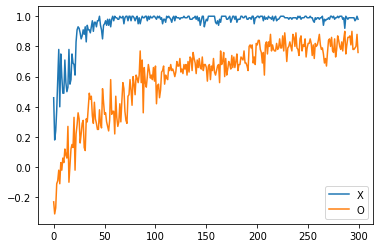

In [ ]:
plt.plot(eval_results_x, label="X")
plt.plot(np.array(eval_results_o), label="O")
plt.legend()

с Exporation epsilon - 0.1. обучились только Х, а О не смогли. Эту модель обучал при epsilon = 0.3

## Q learning 4x4

In [ ]:
env4 = TicTacToe(4, 4, 4)

In [ ]:
game_manager4 = GameManager(env4)

eval_results_o = []
eval_results_x = []
for i in range(2000):
    eval_x = []
    eval_o = []
    for _ in range(2000):
        game_manager4.run_episode()
    for _ in range(100):
        eval_x.append(game_manager4.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager4.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

0.15 -0.11
0.08 -0.1
-0.01 -0.04
0.13 0.03
-0.03 -0.04
-0.04 -0.12
-0.02 0.03
0.17 -0.02
0.13 0.05
-0.04 -0.09
0.1 -0.11
0.11 -0.15
-0.1 -0.01
0.03 -0.03
0.1 -0.11
0.17 -0.06
0.13 -0.08
-0.2 -0.0
0.01 -0.17
0.07 0.11
0.12 0.07
0.09 0.05
0.12 -0.16
-0.04 -0.16
0.13 0.01
0.01 -0.12
-0.04 -0.02
0.11 0.05
-0.14 0.01
-0.08 -0.12
0.07 0.01
0.16 -0.05
0.02 -0.09
0.12 0.06
0.12 -0.04
-0.04 -0.05
0.1 0.03
0.05 -0.06
-0.13 -0.1
0.02 -0.0
-0.11 -0.08
0.05 0.07
0.26 -0.12
0.01 -0.11
0.18 -0.01
-0.07 -0.03
0.15 -0.07
0.01 0.01
-0.03 -0.04
0.16 -0.05
0.12 -0.07
0.11 -0.05
0.08 0.05
0.1 -0.04
0.17 -0.11
0.08 -0.05
0.09 -0.03
-0.01 0.01
0.08 -0.05
0.01 -0.04
-0.04 -0.07
0.04 -0.07
-0.05 0.1
0.21 -0.05
0.13 -0.05
0.06 -0.13
-0.04 0.04
0.11 -0.03
-0.12 -0.19
0.08 0.06
0.04 -0.23
0.1 0.02
0.01 -0.05
0.12 0.01
0.12 -0.12
0.04 0.06
-0.03 0.03
0.09 -0.04
0.03 -0.21
0.14 -0.14
0.13 -0.0
0.21 0.07
0.16 -0.16
0.19 0.01
0.1 -0.07
-0.07 -0.16
0.07 -0.06
0.04 0.02
-0.02 -0.15
0.14 0.1
-0.01 -0.03
0.04 -0.01
0.05 

In [ ]:
with open('q_dict4.pkl', 'wb') as handle:
    pickle.dump(dict(game_manager4.Q), handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('q_dict4.pkl', 'rb') as f:
    data_new = pickle.load(f)

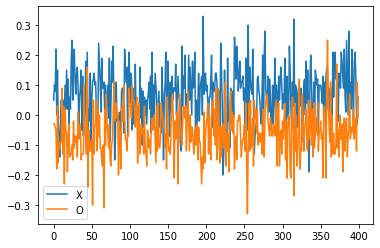

In [ ]:
plt.plot(eval_results_x, label="X")
plt.plot(np.array(eval_results_o), label="O")
plt.legend()

In [ ]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

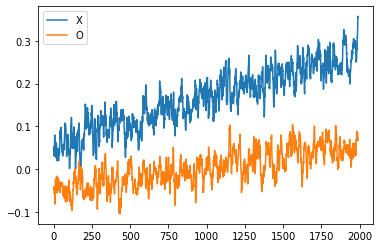

In [ ]:
plt.plot(moving_average(eval_results_x, 10), label="X")
plt.plot(moving_average(np.array(eval_results_o), 10), label="O")
plt.legend()

## Q learning 5x5

In [ ]:
env5 = TicTacToe(5, 5, 5)

In [ ]:
game_manager5 = GameManager(env5)

eval_results_o = []
eval_results_x = []
for i in range(700):
    eval_x = []
    eval_o = []
    for _ in range(4000):
        game_manager4.run_episode()
    for _ in range(100):
        eval_x.append(game_manager4.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager4.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

In [ ]:
with open('q_dict5.pkl', 'wb') as handle:
    pickle.dump(dict(game_manager5.Q), handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('q_dict5.pkl', 'rb') as f:
    data_new = pickle.load(f)

In [ ]:
plt.plot(eval_results_x, label="X")
plt.plot(np.array(eval_results_o), label="O")
plt.legend()

# Пункт 2 3x3

In [ ]:
import dqn
import importlib
importlib.reload(dqn)

<module 'dqn' from '/mnt/c/Homeworks/rl_dl_made_homeworks/HW2/dqn.py'>

In [7]:
from dqn import DQN, ReplayMemory, Transition, DuelingDQN

In [8]:
import torch
import torch.nn as nn

In [9]:
def prepare_memory_s(s: str, size):
    return np.array(list(s)).astype(float).reshape(size, size)

class PlayerDQN:
    def __init__(self, lr, gamma, model, memory, epsilon, game_size) -> None:
        self.s = None
        self.a = None
        self.lr = lr
        self.gamma = gamma
        self.model = model
        self.memory = memory
        self.epsilon = epsilon
        self.game_size = game_size
        
    def update_memory(self, next_s, next_a, r) -> None:
        if self.a is not None and self.s is not None:
            mask = get_blocked_actions(self.s)
            self.memory.store((prepare_memory_s(self.s, self.game_size), self.a,
                               prepare_memory_s(next_s, self.game_size), r, mask))
        self.s = next_s
        self.a = next_a
            
    def get_action(self, s) -> int:
        if np.random.random() < self.epsilon:
            return random.choice(get_empty_actions(s))
        s_tensor = torch.Tensor(prepare_memory_s(s, self.game_size)).view(-1, 1, self.game_size, self.game_size)
        actions = self.model(s_tensor.to("cuda"))
        actions = actions.flatten()
        actions[get_blocked_actions(s)] = -999999999
        return actions.argmax().item()
    
    def get_greedy_action(self, s) -> int:
        s_tensor = torch.Tensor(prepare_memory_s(s, self.game_size)).view(-1, 1, self.game_size, self.game_size)
        actions = self.model(s_tensor.to("cuda"))
        actions = actions.flatten()
        actions[get_blocked_actions(s)] = -999999999
        return actions.argmax().item()

In [10]:
class GameManagerDQN:
    
    def __init__(self, env, game_size, hidden_state_size=128, batch_size=256, dqn=DQN):
        self.batch_size = batch_size
        self.game_size = game_size
        self.memory = ReplayMemory(10000)
        self.env = env
        s, empty_spaces, turn = self.env.getState()
        lr = 0.000001
        gamma = 0.8
        self.dqn = dqn(hidden_state_size, game_size, (len(empty_spaces)), lr, gamma, game_size) # for 3x3 hid_size 256
        self.players = [PlayerDQN(lr, gamma, self.dqn.model, self.memory, 0.3, game_size),
                        PlayerDQN(lr, gamma, self.dqn.model, self.memory, 0.3, game_size)]
        random_player = RandomPlayer()
        self.eval_players = [[random_player, self.players[1]], [self.players[0], random_player]]
        
        
    def run_episode(self):
        self.env.reset()
        self.players[0].a = None
        self.players[1].a = None
        s, empty_spaces, turn =self.env.getState()
        done = False
        player_id = 0

        while not done:
            a = self.players[player_id].get_action(s)
            self.players[player_id].update_memory(s, a, 0)
            player_id = 1 if player_id == 0 else 0 
            (s, empty_spaces, turn), r , done, _ = self.env.step(self.env.action_from_int(a))
        self.players[0].update_memory(s, a, r) 
        self.players[1].update_memory(s, a, -r)
        
    def update_weights(self) -> None:
        transitions = self.memory.sample(self.batch_size)
        self.dqn.train_step(transitions)
        
    def evaluate_episode_with_random(self, random_player_id: int) -> float:
        self.env.reset()
        s, empty_spaces, turn = self.env.getState()
        done = False
        players_eval = self.eval_players[random_player_id]
        player_id = 0
        while not done:
            a = players_eval[player_id].get_greedy_action(s)
            player_id = 1 if player_id == 0 else 0 
            (s, empty_spaces, turn), r , done, _ = self.env.step(self.env.action_from_int(a))
        return r

In [ ]:
env = TicTacToe(3, 3, 3)

In [ ]:
STEPS_PER_UPDATE = 4
STEPS_PER_UPDATE_TARGET = 2000
game_manager_dqn = GameManagerDQN(env, 3, 128)
steps = 0
eval_results_o = []
eval_results_x = []
# fill reply memory
for _ in range(1000):
    game_manager_dqn.run_episode()
for i in range(130):
    eval_x = []
    eval_o = []
    for j in range(1000):
        game_manager_dqn.run_episode()
        steps += 1
        if steps % STEPS_PER_UPDATE == 0:
            game_manager_dqn.update_weights()
        if steps % STEPS_PER_UPDATE_TARGET == 0:
            game_manager_dqn.dqn.update_target_network()
    for _ in range(100):
        eval_x.append(game_manager_dqn.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager_dqn.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

0.99 0.72
1.0 0.7
0.99 0.75
0.96 0.6
0.98 0.79
1.0 0.63
0.98 0.73
0.99 0.7
0.97 0.7
0.92 0.8
0.89 0.84
0.96 0.89
0.97 0.73
0.99 0.9
1.0 0.73
0.99 0.75
0.97 0.74
0.96 0.82
0.99 0.84
1.0 0.84
0.95 0.81
0.98 0.7
0.99 0.85
0.97 0.75
0.98 0.75
0.99 0.8
0.98 0.65
0.97 0.72
0.97 0.79
0.97 0.61


In [ ]:
with open("dqn_model.pth", "wb") as fp:
    torch.save(game_manager_dqn.dqn.model.state_dict(), fp)

In [ ]:
with open("dqn_model.pth", "rb") as fp:
    state_dict = torch.load(fp, map_location="cpu")
# game_manager_dqn.dqn.model.load_state_dict(state_dict)

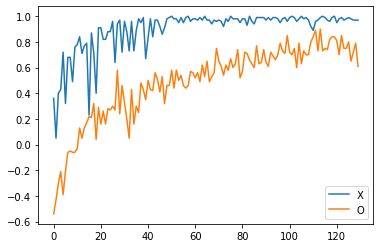

In [ ]:
plt.plot(eval_results_x, label="X")
plt.plot(np.array(eval_results_o), label="O")
plt.legend()

4x4

In [14]:
env4 = TicTacToe(4, 4, 4)

In [33]:
STEPS_PER_UPDATE = 4
STEPS_PER_UPDATE_TARGET = 2000
game_manager_dqn4 = GameManagerDQN(env4, 4, 512)
steps = 0
eval_results_o = []
eval_results_x = []
# fill reply memory
for _ in range(1000):
    game_manager_dqn4.run_episode()
for i in range(400):
    eval_x = []
    eval_o = []
    for j in range(1000):
        game_manager_dqn4.run_episode()
        steps += 1
        if steps % STEPS_PER_UPDATE == 0:
            game_manager_dqn4.update_weights()
        if steps % STEPS_PER_UPDATE_TARGET == 0:
            game_manager_dqn4.dqn.update_target_network()
    for _ in range(100):
        eval_x.append(game_manager_dqn4.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager_dqn4.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

Device: cuda
0.02 -0.05
0.15 0.15
0.1 0.25
0.37 0.1
0.17 0.13
0.37 0.03
0.45 0.03
0.09 0.08
0.34 0.11
0.12 0.03
0.08 0.09
0.29 0.11
0.12 0.01
-0.03 0.11
0.15 0.03
0.32 0.31
0.1 0.17
0.35 0.23
0.36 -0.02
0.12 0.21
0.32 0.22
0.4 0.23
0.28 0.25
0.29 0.24
0.38 0.21
0.38 0.04
0.61 0.29
0.36 0.17
0.69 0.14
0.6 0.18
0.46 0.27
0.64 0.14
0.39 0.51
0.69 0.2
0.5 0.23
0.66 0.24
0.57 0.52
0.73 0.18
0.63 0.02
0.65 0.19
0.79 0.29
0.77 0.23
0.63 0.35
0.43 0.41
0.27 0.52
0.67 0.37
0.48 0.34
0.68 0.36
0.76 0.44
0.54 0.56
0.71 0.29
0.8 0.41
0.8 0.25
0.87 0.26
0.74 0.21
0.81 0.36
0.86 0.32
0.9 0.18
0.8 0.55
0.89 0.43
0.82 0.46
0.9 0.62
0.69 0.35
0.58 0.42
0.74 0.46
0.68 0.57
0.84 0.4
0.85 0.59
0.82 0.41
0.79 0.64
0.84 0.58
0.83 0.39
0.78 0.47
0.9 0.47
0.86 0.47
0.76 0.53
0.87 0.46
0.84 0.56
0.8 0.45
0.91 0.49
0.81 0.64
0.87 0.51
0.88 0.55
0.91 0.44
0.8 0.51
0.85 0.59
0.88 0.56
0.92 0.44
0.92 0.59
0.81 0.6
0.77 0.44
0.88 0.6
0.88 0.53
0.83 0.71
0.93 0.6
0.87 0.51
0.95 0.62
0.94 0.71
0.81 0.53
0.96 0.55
0.8

KeyboardInterrupt: ignored

In [34]:
with open("dqn_model4.pth", "wb") as fp:
    torch.save(game_manager_dqn4.dqn.model.state_dict(), fp)

In [35]:
with open("dqn_model4.pth", "rb") as fp:
    state_dict = torch.load(fp, map_location="cpu")
# game_manager_dqn.dqn.model.load_state_dict(state_dict)

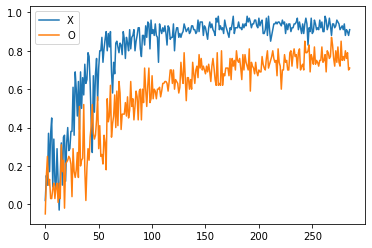

In [36]:
plt.plot(eval_results_x, label="X")
plt.plot(np.array(eval_results_o), label="O")
plt.legend()

## DuelingDQN 3x3

In [11]:
env4 = TicTacToe(3, 3, 3)

STEPS_PER_UPDATE = 4
STEPS_PER_UPDATE_TARGET = 2000
game_manager_dqn4 = GameManagerDQN(env4, 3, 64, 256, DuelingDQN)
steps = 0
eval_results_o = []
eval_results_x = []
# fill reply memory
for _ in range(1000):
    game_manager_dqn4.run_episode()
for i in range(400):
    eval_x = []
    eval_o = []
    for j in range(1000):
        game_manager_dqn4.run_episode()
        steps += 1
        if steps % STEPS_PER_UPDATE == 0:
            game_manager_dqn4.update_weights()
        if steps % STEPS_PER_UPDATE_TARGET == 0:
            game_manager_dqn4.dqn.update_target_network()
    for _ in range(100):
        eval_x.append(game_manager_dqn4.evaluate_episode_with_random(1))
    for _ in range(100):
        eval_o.append(game_manager_dqn4.evaluate_episode_with_random(0))
    mean_x = np.mean(eval_x)
    mean_o = -1 * np.mean(eval_o)
    print(mean_x, mean_o)
    eval_results_x.append(mean_x)
    eval_results_o.append(mean_o)

Device: cpu


AssertionError: Torch not compiled with CUDA enabled

# end